# Ciência de Dados<br><hr> Aula 1: Preparação e transformação dos dados


## Exercícios de fixação

1 - Leia os dados com erro novamente, faça a limpeza e remova as duas últimas colunas.

In [228]:
# gerador de números aleatórios
import random
random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados
# Pandas is used for data manipulation
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

# CSV file
data = pd.read_csv('data/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas:",data.shape)


Número de linhas e colunas: (25, 5)


In [229]:
# verifica se o tipo da coluna condiz com os dadsos mostrados no comando abaixo
print(data.head(7))

# verifica o tipo da coluna
print(data.dtypes)

  sepal_length sepal_width  petal_length petal_width    species
0          5.1         3.5           1.4         0.2  duplicada
1          5.1         3.5           1.4         0.2  duplicada
2            ?           3           1.4         0.2     setosa
3          4.7         3.2           1.3         0.2     setosa
4          5.1         3.5           1.4         0.2  duplicada
5          NaN         3.1           1.5         0.2     setosa
6            5         3.6           1.4         0.2     setosa
sepal_length     object
sepal_width      object
petal_length    float64
petal_width      object
species          object
dtype: object


In [230]:
# achando valores NaN
print(data.isnull().sum())


sepal_length    2
sepal_width     0
petal_length    0
petal_width     1
species         0
dtype: int64


In [231]:
# verificando characteres diferentes 
for col in data.columns:
    print(data[col].value_counts())

5.1    4
5.4    4
4.4    3
5.7    2
4.8    2
5      2
4.9    1
5.8    1
4.6    1
4.3    1
4.7    1
?      1
Name: sepal_length, dtype: int64
3.5    4
3.9    3
3      3
3.4    3
2.9    3
3.1    2
3.2    1
4.4    1
3.8    1
3.6    1
?      1
3.7    1
4      1
Name: sepal_width, dtype: int64
1.4    11
1.5     6
1.7     3
1.3     2
1.6     1
1.1     1
1.2     1
Name: petal_length, dtype: int64
0.2    14
0.4     3
0.3     3
0.1     3
?       1
Name: petal_width, dtype: int64
setosa       17
duplicada     8
Name: species, dtype: int64


In [278]:
import numpy as np
import re

# gerador de números aleatórios
import random
random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados
# Pandas is used for data manipulation
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

# CSV file
data = pd.read_csv('data/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas:",data.shape)

# usando regex para encontrar valores diferentes de float 
regex = r'^[0-9]+\.?[0-9]+$'

def not_float(x):
    if not (pd.isna(x)):
        if not (re.findall(regex, str(x))):
            x = np.nan
#             print(x)
    return x
for col in data.columns[:-1]:
    data[str(col)] = data[str(col)].apply(not_float)


Número de linhas e colunas: (25, 5)


In [272]:
# Remove as linhas com Nan
data = data.dropna()
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
14,4.4,2.9,1.4,0.2,duplicada


In [273]:
# for col in data.columns:
#     print(data[col].value_counts())

In [274]:
# Retorna True na posição em que há uma linha duplicada
data.duplicated()

0     False
1      True
3     False
4      True
7     False
8      True
11    False
12    False
13    False
14     True
15    False
17     True
20    False
22    False
dtype: bool

In [275]:
# Remove as linhas duplicadas
data = data.drop_duplicates()
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
20,5.7,4.4,1.5,0.4,setosa
22,5.1,3.5,1.4,0.3,setosa


In [276]:
print("Atributos atuais:",data.columns)
print("Colunas removidas:", data.columns[[3, 4]])
# Remove as linhas especificadas
data = data.drop(data.columns[[3,4]], axis=1)
data.head(25)

Atributos atuais: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Colunas removidas: Index(['petal_width', 'species'], dtype='object')


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
7,5.4,3.9,1.7
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
20,5.7,4.4,1.5
22,5.1,3.5,1.4


2 - Leia os dados com erro novamente e insira a mediana de cada atributo onde for encontrada NaN.

In [289]:
import numpy as np
import re

# gerador de números aleatórios
import random
random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados
# Pandas is used for data manipulation
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

# CSV file
data = pd.read_csv('data/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas:",data.shape)

# usando regex para encontrar valores diferentes de float 
regex = r'^[0-9]+\.?[0-9]+$'

def not_float(x):
    if not (pd.isna(x)):
        if not (re.findall(regex, str(x))):
            x = np.nan

    return x
for col in data.columns[:-1]:
    data[str(col)] = data[str(col)].apply(not_float)

Número de linhas e colunas: (25, 5)


In [291]:
col = data.columns[:-1]
print("colunas",col)

# convertemos para o formato Numpy e ignoramos a última coluna (classe)
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float) 
# calculamos a mediana de cada atributo e armazenamos em um vetor
# Usamos a função nanmedian que calcula a mediana ignorando os Nan
averages = np.nanmedian(X, axis = 0) # veja https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html
print("averages: ", averages)
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = averages[j] # insere a mediana
print(X)

colunas Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
averages:  [5.1 3.5 1.4 0.2]
[[5.1 3.5 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [5.1 3.5 1.4 0.2]
 [5.1 3.1 1.5 0.2]
 [5.1 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.2]
 [5.1 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.5 1.4 0.1]
 [4.4 2.9 1.4 0.2]
 [4.3 3.5 1.1 0.1]
 [5.8 3.5 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.2]
 [5.1 3.5 1.4 0.3]
 [5.7 3.5 1.7 0.3]
 [5.1 3.8 1.5 0.3]]


In [286]:
df = pd.DataFrame(data=X, columns=col)
print(df.head(5))

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           5.1          3.5           1.4          0.2
2           5.1          3.5           1.4          0.2
3           4.7          3.2           1.3          0.2
4           5.1          3.5           1.4          0.2


In [288]:
df.to_csv('exercicio2.csv', index=False)

3 - Conside os dados da Iris e mostre a distribuição de probabilidades de cada uma das variáveis após a normalização e padronização.

In [294]:
import pandas as pd
# CSV file
data = pd.read_csv('data/iris.csv', header=(0))
print(data.shape)
data.head(25)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Normalizando

Para normalizar os dados no intervalo [0,1]:

In [300]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# considera somente os atributos, ignorando a última coluna, que contem a classe
X = np.array(data[data.columns[0:data.shape[1]-1]])
for i  in range(X.shape[1]):
    print("Maior valor da coluna:", i, ":", max(X[:,i]))
    print("Menor Valor da coluna:", i, ":", min(X[:,i]))
# prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
# Realiza a normalização e coloca em um novo vetor
X_norm = scaler.fit_transform(X)
# print(X_norm)

Maior valor da coluna: 0 : 7.9
Menor Valor da coluna: 0 : 4.3
Maior valor da coluna: 1 : 4.4
Menor Valor da coluna: 1 : 2.0
Maior valor da coluna: 2 : 6.9
Menor Valor da coluna: 2 : 1.0
Maior valor da coluna: 3 : 2.5
Menor Valor da coluna: 3 : 0.1


In [296]:
# Ou seja, o máximo e mínimo do novo conjunto de dados:
print('Mínimo dos atributos:', np.amin(X_norm, axis=0))
print('Máximo dos atributos:', np.amax(X_norm, axis=0))

Mínimo dos atributos: [0. 0. 0. 0.]
Máximo dos atributos: [1. 1. 1. 1.]


#### Padronizando

Para realizarmos a padronização dos dados, de forma que os atributos apresentem média igual a zero e variância igual a 1, o procedimento é parecido.

In [298]:
from sklearn.preprocessing import StandardScaler
X = np.array(data[data.columns[0:data.shape[1]-1]])
# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)
# realiza a padronização (média=0, variância = 1)
rescaledX = scaler.transform(X)
# print(rescaledX)

In [299]:
# Vamos verificar se cada coluna apresenta média igual a zero e desvio padrão igual a um.
for i in np.arange(0,rescaledX.shape[1]):
    print('Media da coluna', i, 'é igual a: ', np.mean(rescaledX[:,i]))
    print('Desvio padrão da coluna', i, 'é igual a: ', np.std(rescaledX[:,i]),'\n')

Media da coluna 0 é igual a:  -4.736951571734001e-16
Desvio padrão da coluna 0 é igual a:  1.0 

Media da coluna 1 é igual a:  -6.631732200427602e-16
Desvio padrão da coluna 1 é igual a:  0.9999999999999999 

Media da coluna 2 é igual a:  3.315866100213801e-16
Desvio padrão da coluna 2 é igual a:  0.9999999999999998 

Media da coluna 3 é igual a:  -2.842170943040401e-16
Desvio padrão da coluna 3 é igual a:  1.0 



In [ ]:
Terminarrr

4 - Reamostre os dados da Iris e selecione 10 elementos em cada classe.

In [315]:
import pandas as pd
# CSV file
data = pd.read_csv('data/iris.csv', header=(0))
print(data.shape)
# data.head(25)

(150, 5)


In [316]:
# O histograma do número de elementos em cada classe:
classes = data[data.columns[-1]]
# armazena os nomes das classes
cl = np.unique(classes)
print("classes", cl)
# armazena o número de elementos em cada classe
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
print(ncl)

classes ['setosa' 'versicolor' 'virginica']
[50. 50. 50.]


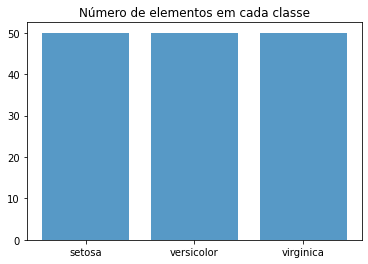

In [317]:
# número de classes
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
# mostra o nome das classes ao invés dos números
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Podemos redistribuir os dados de modo que cada classes contenha o mesmo número de elementos.

Vamos balancear os dados de forma que cada classe contenha $N$ elementos. Escolhermos $N$ elementos de forma aleatória, sem reposição, de cada classe.

In [331]:
N = 10
col = data.columns
# classes
cl = np.unique(classes)
X = np.array(data)
Xnew = []
cls = np.array(data[data.columns[-1]])
for i in np.arange(0, len(cl)):
    a = np.argwhere(cls == cl[i])
    # seleciona os índices nos dados de forma aleatória
    inds = np.random.choice(a[:,0],N,replace=False)
    Xnew.append(X[inds,:])
Xnew = np.array(Xnew)
print('Dados obtidos a partir da amostragem')

# Transformando em um numpy 2d
Xnew = Xnew.reshape(30, -1)
print(Xnew)
df = pd.DataFrame(data=Xnew, columns=col)


Dados obtidos a partir da amostragem
[[4.8 3.4 1.6 0.2 'setosa']
 [5.0 3.4 1.6 0.4 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.1 3.5 1.4 0.3 'setosa']
 [4.5 2.3 1.3 0.3 'setosa']
 [4.4 3.2 1.3 0.2 'setosa']
 [4.6 3.2 1.4 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [5.5 3.5 1.3 0.2 'setosa']
 [6.4 2.9 4.3 1.3 'versicolor']
 [5.5 2.6 4.4 1.2 'versicolor']
 [6.6 2.9 4.6 1.3 'versicolor']
 [5.7 2.8 4.5 1.3 'versicolor']
 [5.1 2.5 3.0 1.1 'versicolor']
 [6.4 3.2 4.5 1.5 'versicolor']
 [6.5 2.8 4.6 1.5 'versicolor']
 [6.0 2.9 4.5 1.5 'versicolor']
 [6.3 3.3 4.7 1.6 'versicolor']
 [5.7 2.6 3.5 1.0 'versicolor']
 [7.7 3.8 6.7 2.2 'virginica']
 [7.9 3.8 6.4 2.0 'virginica']
 [6.3 3.3 6.0 2.5 'virginica']
 [6.2 2.8 4.8 1.8 'virginica']
 [6.5 3.0 5.2 2.0 'virginica']
 [5.6 2.8 4.9 2.0 'virginica']
 [6.9 3.1 5.1 2.3 'virginica']
 [7.2 3.0 5.8 1.6 'virginica']
 [6.1 3.0 4.9 1.8 'virginica']
 [5.8 2.8 5.1 2.4 'virginica']]


In [330]:
# O histograma do número de elementos em cada classe:
classes = df[data.columns[-1]]
# armazena os nomes das classes
cl = np.unique(classes)
print("classes", cl)
# armazena o número de elementos em cada classe
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
print(ncl)

classes ['setosa' 'versicolor' 'virginica']
[10. 10. 10.]


5 - Monte um boxplot para cada variável dos dados da Iris.

6 - Encontre os outliers nos dados das bases Iris e BostonHouse.